# Exploring the Google and Apple Mobility Data

In [ ]:
!pip install eurostat

  Using cached https://files.pythonhosted.org/packages/ea/d7/c6e5fd4f14c6d60a529c1e592bcf772d4c74e6403bf1f1508b46dfe73ac2/eurostat-0.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/5d/7e29616b0376d0a15eb3013c909c4e9021b6c6e244ef1b48817b4d0c4d46/pandaSDMX-0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/7c/45001b1f19af8c4478489fbae4fc657b21c4c669d7a5a036a86882581d85/jsonpath-rw-1.4.0.tar.gz
     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-cp36-none-any.whl size=15146 sha256=d01562d4bf408b88932030b36bd21f8007604e28f7a181804593ac49c1e4f31c
  Stored in directory: /root/.cache/pip/wheels/5c/00/9a/82822db383c2d96dcebf839786665a185f92d37e5026f9806f
Successfully built jsonpath-rw


In [ ]:
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import io
import seaborn as sns
import matplotlib.pyplot as plt
import eurostat

# Apple Mobility Data

In [ ]:
quote_page = 'https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json'

page = requests.get(quote_page).content
csv_path = json.loads(page)['regions']['en-us']['csvPath']
base_path = json.loads(page)['basePath']
apple_url = 'https://covid19-static.cdn-apple.com%s%s' %(base_path, csv_path)

response = requests.get(apple_url).content

NameError: ignored

In [ ]:
#pd.set_option('display.max_columns', None)
#data=pd.read_csv(apple_url)

#apple_data = data
#apple_data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


geo_type        region transportation_type alternative_name  \
0     country/region       Albania             driving              NaN   
1     country/region       Albania             walking              NaN   
2     country/region     Argentina             driving              NaN   
3     country/region     Argentina             walking              NaN   
4     country/region     Australia             driving               AU   
...              ...           ...                 ...              ...   
4686          county   York County             walking              NaN   
4687          county  Young County             driving              NaN   
4688          county   Yuba County             driving              NaN   
4689          county   Yuma County             driving              NaN   
4690          county   Yuma County             walking              NaN   

        sub-region        country  2020-01-13  2020-01-14  2020-01-15  \
0              NaN            NaN       100.0       95.30      101.43   
1              NaN            NaN       100.0      100.68       98.93   
2              NaN            NaN       100.0       97.07      102.45   
3              NaN            NaN       100.0       95.11      101.37   
4              NaN            NaN       100.0      102.98      104.21   
...            ...            ...         ...         ...         ...   
4686  Pennsylvania  United States       100.0      110.22      121.82   
4687         Texas  United States       100.0       98.85       97.76   
4688    California  United States       100.0      102.98      103.10   
4689       Arizona  United States       100.0      101.82      106.67   
4690       Arizona  United States       100.0       95.88       98.97   

      2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  2020-01-21  \
0          97.20      103.55      112.67      104.83       94.39       94.07   
1          98.46      100.85      100.13       82.13       95.65       97.78   
2         111.21      118.45      124.01       95.44       95.13       95.42   
3         112.67      116.72      114.14       84.54      101.37      106.12   
4         108.63      109.08       89.00       99.35      103.53      106.80   
...          ...         ...         ...         ...         ...         ...   
4686      109.72      140.72      102.87      117.24      115.91      103.43   
4687       92.21      115.79      128.73       92.48      114.43      106.30   
4688      114.08      118.83      121.49       93.29      101.86      103.01   
4689      108.93      135.92      124.77       92.88      108.37      105.18   
4690       92.88      117.25      128.93       79.23      115.28      109.10   

      2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
0          93.51       92.94      102.13      102.38      101.41       94.62   
1          95.39       94.24       93.73       97.06       77.27       83.37   
2          97.66       99.42      113.34      118.23       91.31       93.37   
3         104.91      102.56      104.88       98.83       73.64       94.27   
4         107.40      115.65      109.66       88.59       85.18       95.91   
...          ...         ...         ...         ...         ...         ...   
4686      115.80       96.96      133.65      145.36       91.16      106.80   
4687       97.09      109.15      149.66      120.05       92.82       94.99   
4688      101.50      109.50      122.58      120.03       91.19      101.50   
4689      105.24      109.54      132.21      125.12       94.11      103.45   
4690      101.03      111.67      122.06      138.54       86.44      104.03   

      2020-01-28  2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
0          89.12       90.17       90.21       97.71      102.50      108.92   
1          82.73       84.39       88.19       90.79       88.70       79.32   
2          91.12       92.35       96.74      111.24      123.96       8

In [ ]:
pd.set_option('display.max_columns', None)
data=pd.read_csv(apple_url)

data = data.set_index(['region','transportation_type']).transpose()
data.drop(data.index[:4], inplace=True)
data.index = pd.to_datetime(data.index)
data.bfill(inplace=True)
apple_data = data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
apple_data

region              Albania         Argentina         Australia          \
transportation_type driving walking   driving walking   driving transit   
2020-01-13           100.00  100.00    100.00  100.00    100.00  100.00   
2020-01-14            95.30  100.68     97.07   95.11    102.98  101.78   
2020-01-15           101.43   98.93    102.45  101.37    104.21  100.64   
2020-01-16            97.20   98.46    111.21  112.67    108.63   99.58   
2020-01-17           103.55  100.85    118.45  116.72    109.08   98.34   
...                     ...     ...       ...     ...       ...     ...   
2020-11-18            90.14  121.41     70.25   57.55    101.82   62.17   
2020-11-19            97.88  126.01     73.21   60.21    109.64   66.55   
2020-11-20            99.05  120.09     91.41   70.59    108.84   69.77   
2020-11-21           111.07  123.58     99.28   68.75     91.48   57.04   
2020-11-22           115.80  107.08     72.55   45.72     95.10   60.45   

region                      Austria         Belgium                  Brazil  \
transportation_type walking driving walking driving transit walking driving   
2020-01-13           100.00  100.00  100.00  100.00  100.00  100.00  100.00   
2020-01-14           101.31  101.14  101.55  101.19   98.67  101.46   99.71   
2020-01-15           101.82  104.24  105.59  107.49  105.01  110.44  100.90   
2020-01-16           104.52  112.21  112.24  107.67  105.87  118.86  101.88   
2020-01-17           113.73  117.23  123.36  117.38  113.55  139.10  113.69   
...                     ...     ...     ...     ...     ...     ...     ...   
2020-11-18            81.56   65.30   56.40   87.29   74.27   89.82  106.41   
2020-11-19            88.82   64.30   51.79   81.04   67.81   74.04  107.43   
2020-11-20           106.37   61.09   49.55   84.86   70.35   81.91  125.72   
2020-11-21            86.94   53.08   47.28   78.68   64.14   81.89  132.51   
2020-11-22            76.02   58.79   48.09   71.01   62.85   63.91   97.37   

region                              Bulgaria         Cambodia          Canada  \
transportation_type transit walking  driving walking  driving walking driving   
2020-01-13           100.00  100.00   100.00  100.00   100.00  100.00  100.00   
2020-01-14           102.45  106.30   102.56  101.90   100.75   98.06  102.91   
2020-01-15           104.28  104.75   104.73   99.61    99.33   99.70   99.74   
2020-01-16           100.20   99.05   104.35  100.06    96.00   98.00  105.17   
2020-01-17            97.06  104.13   114.79  117.97    98.78  106.81  122.34   
...                     ...     ...      ...     ...      ...     ...     ...   
2020-11-18            72.56   98.80    74.33   90.73    45.80   73.20   96.56   
2020-11-19            70.25  101.03    72.73   83.39    48.27   84.58   99.97   
2020-11-20            65.61  113.42    82.73   92.83    51.51   81.78  116.29   
2020-11-21            61.65  116.71    78.07   83.00    52.99   85.25  101.03   
2020-11-22            50.74   74.87    74.17   75.33    49.76   74.03   73.04   

region                                Chile         Colombia         Croatia  \
transportation_type transit walking driving walking  driving walking driving   
2020-01-13           100.00  100.00  100.00  100.00   100.00  100.00  100.00   
2020-01-14           100.03  106.29   99.01  102.58    97.85  103.15  102.23   
2020-01-15            98.01  106.65  102.57  103.13    99.65  104.44  102.77   
2020-01-16           101.01  108.64  106.47  103.74    97.22  102.96   98.19   
2020-01-17           105.42  127.43  124.69  107.87   109.10  112.65  108.51   
...                     ...     ...     ...     ...      ...     ...     ...   
2020-11-18            43.26   94.04   94.09   78.55    83.58  104.06   79.79   
2020-11-19            44.46   98.54   88.64   78.48    79.58  104.11   72.56   
2020-11-20            47.49  118.91  109.10   88.91    91.73  116.32   89.03   
2020-11-21            42.16  107.12   95.27   74.10   106.63  

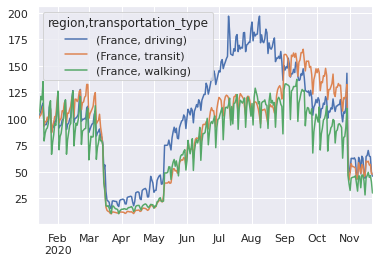

In [ ]:
# Let's plot one of the countries to get an idea of the data. 
sns.set()
pd.set_option('display.max_columns', None)
apple_data[['France']].plot()
plt.show()

Notice that there is a lot of weekly seasonality in the dataset, especially in the driving directions category.

We can filter this weekly seasonality out by using 7-day moving average.

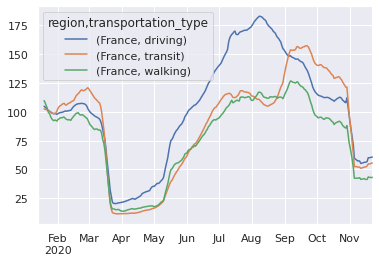

In [ ]:
apple_data[['France']].rolling(7).mean().plot()
plt.show()

# Google Mobility Data

The Google dataset is less frequently updated but more detailed.

In [ ]:
google_url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
response = requests.get(google_url).content

In [ ]:
data = pd.read_csv(google_url, low_memory=False)
# Renaming the columns
rename_dict = {'date':'Date',
               'country_region_code':'Country Code',
               'country_region':'Country_Region',
               'sub_region_1':'Subregion 1',
               'sub_region_2':'Subregion 2',
               'retail_and_recreation_percent_change_from_baseline': 'Retail and Recreation',
               'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery and Pharmacy',
               'parks_percent_change_from_baseline': 'Parks',
               'transit_stations_percent_change_from_baseline': 'Transit Stations',
               'workplaces_percent_change_from_baseline': 'Workplaces',
               'residential_percent_change_from_baseline': 'Residential'}
data.rename(columns = rename_dict, inplace=True)
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data

Country Code        Country_Region        Subregion 1 Subregion 2  \
Date                                                                           
2020-02-15           AE  United Arab Emirates                NaN         NaN   
2020-02-16           AE  United Arab Emirates                NaN         NaN   
2020-02-17           AE  United Arab Emirates                NaN         NaN   
2020-02-18           AE  United Arab Emirates                NaN         NaN   
2020-02-19           AE  United Arab Emirates                NaN         NaN   
...                 ...                   ...                ...         ...   
2020-11-16           ZW              Zimbabwe  Midlands Province      Kwekwe   
2020-11-17           ZW              Zimbabwe  Midlands Province      Kwekwe   
2020-11-18           ZW              Zimbabwe  Midlands Province      Kwekwe   
2020-11-19           ZW              Zimbabwe  Midlands Province      Kwekwe   
2020-11-20           ZW              Zimbabwe  Midlands Province      Kwekwe   

           metro_area iso_3166_2_code  census_fips_code  \
Date                                                      
2020-02-15        NaN             NaN               NaN   
2020-02-16        NaN             NaN               NaN   
2020-02-17        NaN             NaN               NaN   
2020-02-18        NaN             NaN               NaN   
2020-02-19        NaN             NaN               NaN   
...               ...             ...               ...   
2020-11-16        NaN             NaN               NaN   
2020-11-17        NaN             NaN               NaN   
2020-11-18        NaN             NaN               NaN   
2020-11-19        NaN             NaN               NaN   
2020-11-20        NaN             NaN               NaN   

            Retail and Recreation  Grocery and Pharmacy  Parks  \
Date                                                             
2020-02-15                    0.0                   4.0    5.0   
2020-02-16                    1.0                   4.0    4.0   
2020-02-17                   -1.0                   1.0    5.0   
2020-02-18                   -2.0                   1.0    5.0   
2020-02-19                   -2.0                   0.0    4.0   
...                           ...                   ...    ...   
2020-11-16                    NaN                   NaN    NaN   
2020-11-17                    NaN                   NaN    NaN   
2020-11-18                    NaN                   NaN    NaN   
2020-11-19                    NaN                   NaN    NaN   
2020-11-20                    NaN                   NaN    NaN   

            Transit Stations  Workplaces  Residential  
Date                                                   
2020-02-15               0.0         2.0          1.0  
2020-02-16               1.0         2.0          1.0  
2020-02-17               1.0         2.0          1.0  
2020-02-18               0.0         2.0          1.0  
2020-02-19              -1.0         2.0          1.0  
...                      ...         ...          ...  
2020-11-16               NaN         6.0          NaN  
2020-11-17               NaN        20.0          NaN  
2020-11-18               NaN        12.0          NaN  
2020-11-19               NaN        14.0          NaN  
2020-11-20               NaN        14.0          NaN  

[3207149 rows x 13 columns]

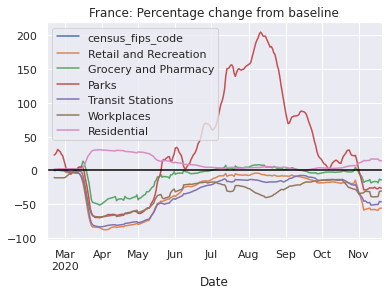

In [ ]:
# Let's plot a country to again quickly inspect the data

country = 'France'
country_data = data.query('Country_Region == @country')
country_data[country_data['Subregion 1'].isnull()].drop(['Subregion 1', 'Subregion 2'], axis=1).rolling(7).mean().plot()
plt.legend(loc="best")
plt.axhline(y=0, color='black', linestyle='-')
plt.title(country+': Percentage change from baseline')
plt.show()

# Looking at trends across the European Union

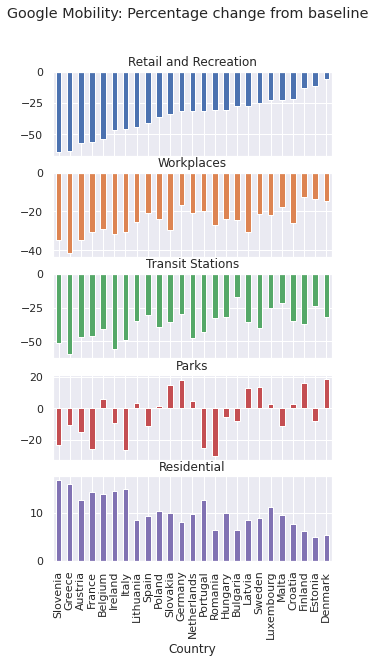

In [ ]:

eu_countries = ['Austria','Belgium','Bulgaria',
             'Croatia','Cyprus','Czech Republic',
             'Denmark','Estonia','Finland',
             'France','Germany','Greece',
             'Hungary','Ireland','Italy',
             'Latvia','Lithuania','Luxembourg',
             'Malta','Netherlands','Poland',
             'Portugal','Romania','Slovakia',
             'Slovenia','Spain','Sweden']

eu = data.query('Country_Region in @eu_countries')
eu[eu['Subregion 1'].isnull()][['Country_Region','Retail and Recreation','Workplaces','Transit Stations','Parks','Residential']].groupby('Country_Region').rolling(7).mean().groupby('Country_Region').last().sort_values(by='Retail and Recreation').plot.bar(figsize=(5,9), subplots=True, legend = False)
plt.suptitle('Google Mobility: Percentage change from baseline')
plt.xlabel('Country')
plt.show()

# Google Aggregate Mobility Index
We combine the mobility data for Workplaces, Retail and Recreation, and Transit Stations to create an aggregate mobility index per EU country.

We do not include residential as doing so would likely skew our index to a higher level than it should be.

We also do not include parks as trends there are heavily dependent on each government's guidance and our focus is on the economic impact of the mobility trends (hence workplaces, retail and transit are more important).

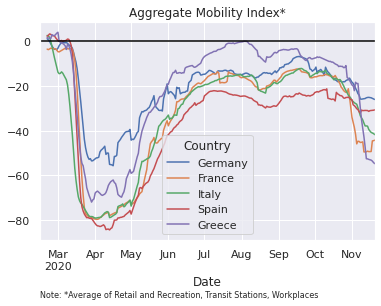

In [ ]:
agg_mobility_index = data[data['Subregion 1'].isnull()].query('Country_Region == @eu_countries').drop(['Subregion 1', 'Subregion 2'], axis=1) \
                    .groupby('Country_Region').rolling(7).mean()[['Retail and Recreation','Transit Stations','Workplaces']].mean(axis=1).unstack(level=0)
agg_mobility_index.rename_axis("Country", axis="columns", inplace=True)

# Plot for the Big 4 (Four biggest EU economies by GDP: Germany, France, Italy, Spain), 
# the United Kingdom (which implemented social distancing measures later than most other EU countries) 
# and Greece (which was one of the first countries to impose significant social distancing measures).


agg_mobility_index[['Germany','France','Italy','Spain','Greece']].plot()
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Aggregate Mobility Index*')
plt.annotate('Note: *Average of Retail and Recreation, Transit Stations, Workplaces', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top',fontsize=8)
plt.show()

# Back to Apple Mobility Data
Upon looking at the data, a natural question arises. Do the two datasets tell us the same thing about mobility trends in each country, despite the fact they use different measures to track activity? Both datasets compare activity levels relative to some baseline level, that baseline however is defined differently in each dataset.

Apple uses - as described above - 13 January as its baseline, while Google uses "the median value for that day of the week from the 5‑week period Jan 3 – Feb 6, 2020".

Let's try and transform the Apple data using Google's thinking. Given we are using a 7-day moving average in our calculations, calculating the median value for each day of the week for the above 5-week period is unnecessary as we are already filtering out the weekly seasonality.

For that reason, we instead calculate the median index value until 6 February (note the Apple data start from 13 January)

In [ ]:
pre_covid_median = apple_data.loc[:'2020-02-06',(eu_countries,['driving'])].median(axis=0).droplevel('transportation_type',axis=0) 
pre_covid_median

region
Austria           107.88
Belgium           108.65
Bulgaria          105.02
Croatia           100.00
Czech Republic    108.64
Denmark           106.05
Estonia           107.61
Finland           103.37
France             98.36
Germany           105.13
Greece            100.60
Hungary           103.75
Ireland           119.08
Italy             105.67
Latvia            103.71
Lithuania         102.22
Luxembourg         95.53
Netherlands       103.86
Poland            104.75
Portugal          107.63
Romania            95.80
Slovakia          100.71
Slovenia          102.17
Spain             109.43
Sweden            108.98
dtype: float64

Now that we have the median values for each EU country, let's apply the transformation by dividing each data point in the country series with our country median value.

Not all of the EU countries have data for all the different methods of transportation, so we only use driving.


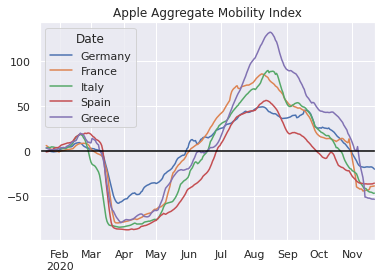

In [ ]:
apple_agg_mobility_index = apple_data.loc[:,(eu_countries,['driving'])].rolling(7).mean().apply(lambda x: x/pre_covid_median[x.name[0]]*100-100,axis=0).droplevel('transportation_type',axis=1)
apple_agg_mobility_index.rename_axis("Date", axis="columns", inplace=True)

apple_agg_mobility_index[['Germany','France','Italy','Spain','Greece']].plot()
plt.title('Apple Aggregate Mobility Index')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

Our mobility index shows activity (to be precise, driving activity) has already recovered close to its pre Covid-19 level.

# Merging the two datasets
How closely related are our two datasets? Can they be used interchangably given one (Apple) is more frequently updated than the other but one is more detailed?

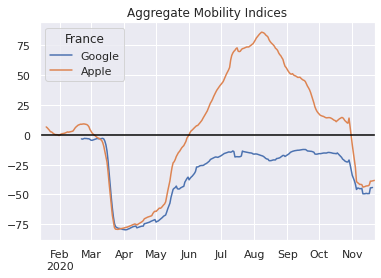

In [ ]:
d = {'Google' : agg_mobility_index, 'Apple' : apple_agg_mobility_index}
mobility_index_all = pd.concat(d.values(), axis=1, keys=d.keys())

specific_country = 'France'
mobility_index_all.loc[:,(slice(None),specific_country)].plot()
plt.legend(title=specific_country,labels=['Google','Apple'])
plt.title('Aggregate Mobility Indices')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

# Let's merge the two dataframes into one to keep track of all our series in one place

In [ ]:
mobility_index_all.rename_axis(['Indicator','Country'], axis="columns", inplace=True)
mobility_index_all.rename_axis('Date', axis="index", inplace=True)

pd.set_option('display.max_columns', 20)
mobility_index_all.tail(10)

Indicator      Google                                                         \
Country       Austria    Belgium   Bulgaria    Croatia    Denmark    Estonia   
Date                                                                           
2020-11-13 -37.761905 -49.380952 -22.333333 -21.476190 -17.904762 -10.428571   
2020-11-14 -37.380952 -49.142857 -22.333333 -21.619048 -17.809524 -11.285714   
2020-11-15 -37.333333 -50.238095 -22.380952 -21.904762 -17.904762 -12.619048   
2020-11-16 -36.095238 -49.142857 -22.476190 -22.285714 -17.809524 -13.238095   
2020-11-17 -38.714286 -47.857143 -22.666667 -21.857143 -17.761905 -14.095238   
2020-11-18 -41.000000 -43.476190 -23.047619 -27.000000 -17.666667 -14.809524   
2020-11-19 -43.523810 -42.523810 -23.190476 -27.000000 -17.761905 -15.666667   
2020-11-20 -46.190476 -41.142857 -23.047619 -27.523810 -17.428571 -16.285714   
2020-11-21        NaN        NaN        NaN        NaN        NaN        NaN   
2020-11-22        NaN        NaN        NaN        NaN        NaN        NaN   

Indicator                                               ...      Apple  \
Country       Finland     France    Germany     Greece  ...  Lithuania   
Date                                                    ...              
2020-11-13 -20.095238 -49.476190 -25.238095 -52.571429  ... -24.601001   
2020-11-14 -20.000000 -49.142857 -25.095238 -52.619048  ... -24.004249   
2020-11-15 -20.095238 -49.380952 -25.047619 -52.857143  ... -24.206893   
2020-11-16 -20.142857 -49.380952 -25.142857 -53.000000  ... -24.389971   
2020-11-17 -20.285714 -49.333333 -25.238095 -53.190476  ... -24.691841   
2020-11-18 -20.238095 -44.571429 -25.523810 -53.619048  ... -23.710764   
2020-11-19 -20.619048 -44.476190 -25.761905 -54.285714  ... -22.967269   
2020-11-20 -20.904762 -44.238095 -26.000000 -54.761905  ... -22.408251   
2020-11-21        NaN        NaN        NaN        NaN  ... -22.518657   
2020-11-22        NaN        NaN        NaN        NaN  ... -23.084663   

Indicator                                                                      \
Country    Luxembourg Netherlands     Poland   Portugal    Romania   Slovakia   
Date                                                                            
2020-11-13 -23.409251  -25.233144 -28.294579 -33.808949 -25.845511 -22.762671   
2020-11-14 -22.377413  -25.802591 -28.009547 -37.724479 -26.526991 -21.999518   
2020-11-15 -22.057394  -26.436687 -27.605864 -39.826920 -27.063823 -22.388187   
2020-11-16 -21.646155  -26.637507 -27.562223 -39.556151 -26.753653 -21.534250   
2020-11-17 -22.078330  -26.728288 -27.796795 -39.672954 -26.480763 -20.771097   
2020-11-18 -21.906357  -26.436687 -26.289806 -39.641098 -25.196839 -19.093011   
2020-11-19 -21.523530  -26.378917 -25.815206 -39.346438 -24.764390 -18.091550   
2020-11-20 -21.595310  -25.988281 -25.543812 -38.733226 -24.813600 -17.240450   
2020-11-21 -20.814703  -25.575638 -25.770201 -38.547404 -25.232627 -16.717023   
2020-11-22 -20.841620  -25.021320 -26.906239 -38.469094 -25.854459 -15.958126   

Indicator                                    
Country      Slovenia      Spain     Sweden  
Date                                         
2020-11-13 -45.039780 -36.002141  -9.187793  
2020-11-14 -45.025797 -35.943395  -9.938914  
2020-11-15 -45.580895 -36.197961 -10.730671  
2020-11-16 -46.533089 -36.190128 -11.278609  
2020-11-17 -47.517443 -36.180990 -11.861941  
2020-11-18 -48.018009 -36.126160 -12.375796  
2020-11-19 -48.493407 -36.060887 -13.181973  
2020-11-20 -49.449797 -35.978643 -13.714181  
2020-11-21 -49.771389 -35.481260 -15.199381  
2020-11-22 -50.097177 -35.190141 -15.517919  

[10 rows x 50 columns]

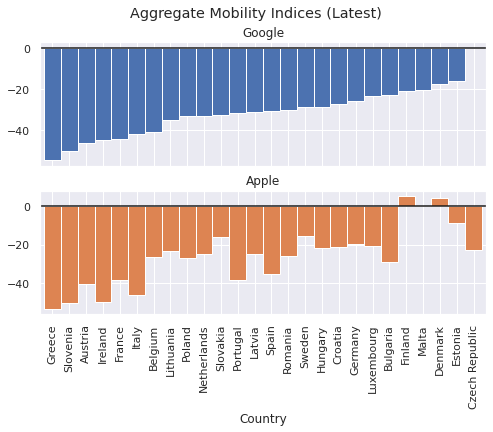

In [ ]:
latest = mobility_index_all.stack().groupby('Country').last()
axes = latest.sort_values('Google').plot.bar(subplots=True,width=1,figsize=(8,5),legend=False)
plt.suptitle('Aggregate Mobility Indices (Latest)')
for ax in axes.flatten():
    ax.axhline(0.0001, color='k', linestyle='-')
plt.show()

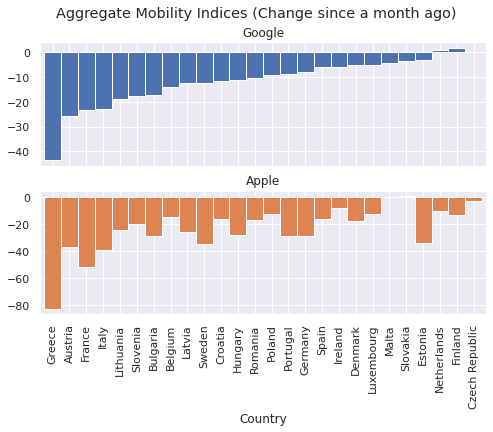

In [ ]:
month_ago = mobility_index_all.stack(level=1).reset_index().set_index('Date').loc['2020-10-24',:].reset_index().set_index('Country').drop('Date',axis=1)
latest.subtract(month_ago).sort_values('Google').plot.bar(subplots=True,width=1,figsize=(8,5),legend=False)
plt.suptitle('Aggregate Mobility Indices (Change since a month ago)')
plt.show()

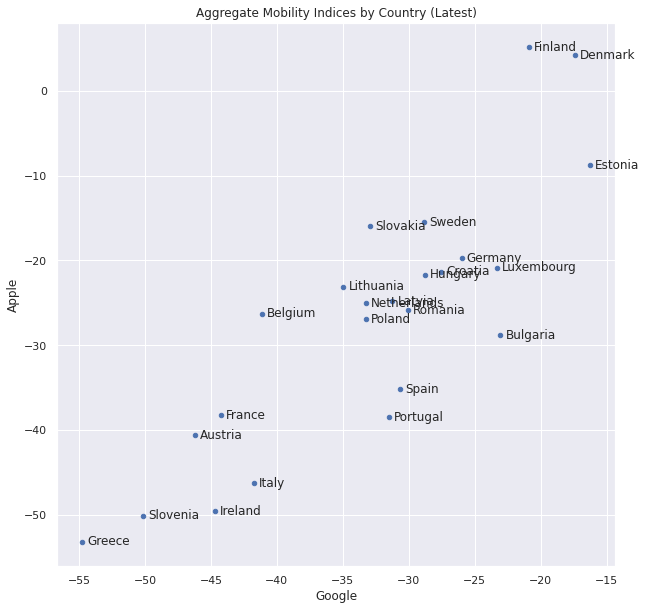

In [ ]:
#Is there a more formal way to check if there is linear relationship between the two indices? Let's start with a scatter plot
# Suppress warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

latest = mobility_index_all.stack(level=1).reset_index().set_index('Date').groupby('Country').last()
latest.plot(kind='scatter',x='Google',y='Apple',figsize=(10,10))

for i, txt in enumerate(latest.index.values):
    plt.annotate(txt, (latest['Google'][i], latest['Apple'][i]),xytext=(5,-3), 
                textcoords='offset points',fontsize=12)
plt.title('Aggregate Mobility Indices by Country (Latest)')
plt.show()

We can see there appears to be some sort of linear relationship between our two series, as common sense dictates: a lower number of direction requests (which can be seen in the Apple dataset) should mean that people in general spend less time visiting different places (which should be reflected in the Google mobility index).

Can we make these observations more mathematically formal? Yes, by estimating a linear regression model for each country.

# Regression Analysis
Note that our data is not cross sectional (calculated at a single point in time) but rather a time series. As such they exhibit trending behaviour which can render our regression results inaccurate.

Without getting too much into the details, to counteract this we can run our regression with day-on-day changes rather than absolute levels as inputs (which we do using the diff() function below).

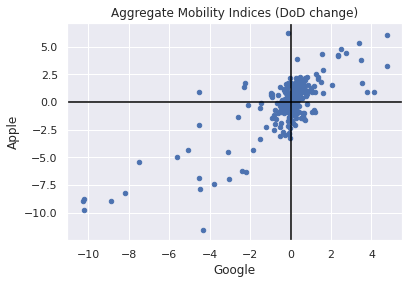

In [ ]:
# Suppress warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

country = 'France'
mobility_index_all.loc[:,(slice(None),[country])].diff(1).dropna().droplevel(1,axis=1).plot.scatter(x='Google',y='Apple')
plt.title('Aggregate Mobility Indices (DoD change)')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.show()

In [ ]:
import statsmodels.api as sm

index_Google = mobility_index_all.loc[:,(slice(None),[country])].diff(1).dropna().droplevel(1,axis=1)['Google'].values
index_Apple = mobility_index_all.loc[:,(slice(None),[country])].diff(1).dropna().droplevel(1,axis=1)['Apple'].values

# We estimate a simple linear regression model with an intercept term and fit the model

index_Google = sm.add_constant(index_Google)
model = sm.OLS(index_Apple,index_Google)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     416.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.12e-56
Time:                        00:09:20   Log-Likelihood:                -496.20
No. Observations:                 273   AIC:                             996.4
Df Residuals:                     271   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0260      0.091     -0.286      0.7

# Comparing with the number of cases
Do countries with a larger number of coronavirus cases show lower levels of activity? 

Let's investigate

In [ ]:
quote_page = 'https://api.covid19api.com/summary'
page = requests.get(quote_page).content
coronavirus_data = json.loads(page)


# next((item for item in coronavirus_data['Countries'] if item["Country"] == "United Kingdom"))

pd.set_option('display.max_rows', 10)
cases = pd.DataFrame([[item['Country'],item['TotalConfirmed']] for item in list(filter(lambda item: item['Country'] in eu_countries, coronavirus_data['Countries']))], columns=['Country','Confirmed Cases'])
cases.set_index('Country',inplace=True)

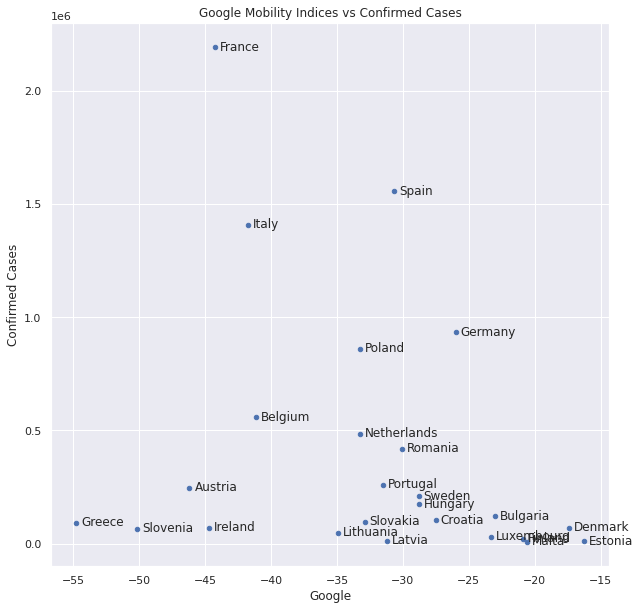

In [ ]:
google_vs_cases = pd.DataFrame([mobility_index_all.stack().groupby('Country').last()['Google'],cases['Confirmed Cases']]).transpose()
google_vs_cases.plot.scatter(x='Google',y='Confirmed Cases',figsize=(10,10))

for i, txt in enumerate(google_vs_cases.index.values):
    plt.annotate(txt, (google_vs_cases['Google'][i], google_vs_cases['Confirmed Cases'][i]),xytext=(5,-3), 
                textcoords='offset points',fontsize=12)
plt.title('Google Mobility Indices vs Confirmed Cases')
plt.show()

# Creating an EU aggregate measure
We have data for all the individual EU countries. Can we combine them to create an aggregate EU mobility index that serves a single point of reference for how mobility trends have been evolving in the European Union as a whole?

An important issue arises. How are we going to weigh each of the EU country series? There are many ways to do this, including using a simple average (assigning equal weight to each of the country series). I decided to go with GDP weights instead, to create an index that puts more emphasis on activity levels of countries with a larger amount of economic activity.

The weights can be found in the Eurostat website :  [Link](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406763_QID_2E34A8C6_UID_-3F171EB0&layout=UNIT,L,X,0;TIME,C,X,1;GEO,L,Y,0;NA_ITEM,L,Z,0;INDICATORS,C,Z,1;&zSelection=DS-406763INDICATORS,OBS_FLAG;DS-406763NA_ITEM,B1GQ;&rankName1=INDICATORS_1_2_-1_2&rankName2=NA-ITEM_1_2_-1_2&rankName3=UNIT_1_2_0_0&rankName4=TIME_1_0_1_0&rankName5=GEO_1_2_0_1&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=NONE&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23)

In [ ]:
gdp_data = eurostat.get_data_df('nama_10_gdp', flags=False)
gdp_data = gdp_data[(gdp_data['na_item']=='B1GQ') & (gdp_data['unit']=='PC_EU28_MEUR_CP')]

gdp_proportions = gdp_data.set_index('geo\\time')[2019].dropna().drop(['EA','NO','CH','EA12','EA19','EU15','EU27_2020','EU28','AL','IS','RS'])
gdp_proportions = gdp_proportions.rename(eurostat.get_dic('geo')).rename({'Germany (until 1990 former territory of the FRG)':'Germany'})/100
gdp_proportions

geo\time
Austria                                                              0.024
Bosnia and Herzegovina                                               0.001
Belgium                                                              0.029
Bulgaria                                                             0.004
Cyprus                                                               0.001
                                                                     ...  
Slovenia                                                             0.003
Slovakia                                                             0.006
Turkey                                                               0.041
United Kingdom                                                       0.153
Kosovo (under United Nations Security Council Resolution 1244/99)    0.000
Name: 2019, Length: 33, dtype: float64

In [ ]:
eu_mobility = mobility_index_all.loc[:,('Google',slice(None))].droplevel(0, axis=1)
country_names = eu_mobility.columns.values

eu_mobility_aggregate = eu_mobility.groupby(eu_mobility.index).apply(lambda x: pd.Series(sum([(x[v] * gdp_proportions[v]) for v in country_names])))

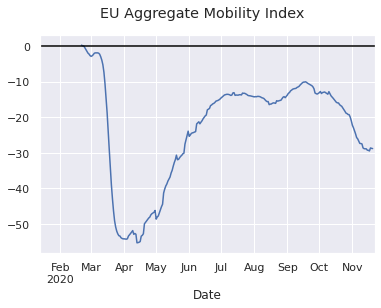

In [ ]:
pd.set_option('display.max_rows', 1000)
sum([eu_mobility[v]* gdp_proportions[v] for v in country_names]).plot()
plt.suptitle('EU Aggregate Mobility Index')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

#Italy: Mobility COVID-19
https://data.humdata.org/dataset/covid-19-mobility-italy


In [ ]:
dataItaly = pd.read_csv("od_matrix_daily_flows_norm_full_2020_01_18_2020_06_26.csv")
dataItaly.head()

p1  p2  2020-01-18  2020-01-19  2020-01-20  2020-01-21  2020-01-22  \
0   1   1      0.9276      0.9076      0.9290      0.9297      0.9250   
1   1   2      0.0060      0.0102      0.0075      0.0073      0.0083   
2   1   3      0.0020      0.0030      0.0014      0.0010      0.0015   
3   1   4      0.0275      0.0315      0.0275      0.0244      0.0248   
4   1   5      0.0095      0.0132      0.0075      0.0093      0.0073   

   2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0      0.9265      0.9215      0.9237      0.9151      0.9256      0.9297   
1      0.0091      0.0078      0.0077      0.0035      0.0092      0.0059   
2      0.0024      0.0032      0.0019      0.0035      0.0019      0.0020   
3      0.0234      0.0260      0.0270      0.0306      0.0241      0.0229   
4      0.0091      0.0110      0.0082      0.0105      0.0082      0.0107   

   2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0      0.9373      0.9208      0.9139      0.9169      0.9151      0.9311   
1      0.0088      0.0092      0.0100      0.0097      0.0065      0.0083   
2      0.0034      0.0029      0.0024      0.0010      0.0030      0.0023   
3      0.0229      0.0238      0.0300      0.0292      0.0263      0.0185   
4      0.0078      0.0073      0.0105      0.0122      0.0079      0.0116   

   2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0      0.9330      0.9237      0.9197      0.9154      0.9222      0.9183   
1      0.0061      0.0076      0.0073      0.0073      0.0081      0.0041   
2      0.0028      0.0010      0.0029      0.0015      0.0025      0.0015   
3      0.0217      0.0234      0.0243      0.0269      0.0269      0.0322   
4      0.0099      0.0086      0.0093      0.0112      0.0102      0.0117   

   2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0      0.9375      0.9300      0.9262      0.9230      0.9157      0.9192   
1      0.0084      0.0090      0.0124      0.0086      0.0078      0.0077   
2      0.0020      0.0024      0.0019      0.0024      0.0024      0.0020   
3      0.0221      0.0233      0.0233      0.0254      0.0271      0.0271   
4      0.0049      0.0095      0.0095      0.0096      0.0107      0.0133   

   2020-02-16  2020-02-17  2020-02-18  2020-02-19  2020-02-20  2020-02-21  \
0      0.9167      0.9262      0.9309      0.9229      0.9130      0.9136   
1      0.0091      0.0083      0.0088      0.0112      0.0083      0.0098   
2      0.0010      0.0019      0.0015      0.0029      0.0024      0.0020   
3      0.0259      0.0218      0.0253      0.0278      0.0313      0.0327   
4      0.0107      0.0078      0.0058      0.0088      0.0127      0.0107   

   2020-02-22  2020-02-23  2020-02-24  2020-02-25  2020-02-26  2020-02-27  \
0      0.9216      0.9262      0.9354      0.9329      0.9404      0.9419   
1      0.0082      0.0058      0.0109      0.0052      0.0076      0.0110   
2      0.0020      0.0005      0.0035      0.0024      0.0019      0.0024   
3      0.0297      0.0206      0.0199      0.0312      0.0227      0.0224   
4      0.0108      0.0111      0.0060      0.0094      0.0061      0.0062   

   2020-02-28  2020-02-29  2020-03-01  2020-03-02  2020-03-03  2020-03-04  \
0      0.9302      0.9399      0.9372      0.9440      0.9289      0.9248   
1      0.0115      0.0054      0.0054      0.0091      0.0076      0.0116   
2      0.0033      0.0010      0.0010      0.0010      0.0014      0.0028   
3      0.0225      0.0210      0.0224      0.0196      0.0270      0.0274   
4      0.0067      0.0093      0.0068      0.0062      0.0099      0.0125   

   2020-03-05  2020-03-06  2020-03-07  2020-03-08  2020-03-09  2020-03-10  \
0      0.9386      0.9220      0.9333      0.9429      0.9541      0.9562   
1      0.0066      0.0082      0.0066      0.0021      0.0051      0.0058   
2      0.0019      0.0015      0.0010      0.0000      0.0005      0.0011   
3      0.0274  

In [ ]:
!wget https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/22b48b6f-42fe-4ae9-9865-c5b11d7d59b1/id_provinces_it.csv

--2020-11-25 15:18:39--  https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/22b48b6f-42fe-4ae9-9865-c5b11d7d59b1/id_provinces_it.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.74.4
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.74.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1903 (1.9K) [text/csv]
Saving to: ‘id_provinces_it.csv’

id_provinces_it.csv 100%[===================>]   1.86K  --.-KB/s    in 0s      

2020-11-25 15:18:39 (66.9 MB/s) - ‘id_provinces_it.csv’ saved [1903/1903]



In [ ]:
!wget https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/04aaa605-2755-4696-9a29-ab9ce3c59c62/average_network_degree_2020_01_18_2020_06_26.csv
!wget https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/4de72939-d513-4d96-831f-124624eaa43c/median_q1_q3_rog_2020_01_18_2020_06_26.csv

--2020-11-25 15:20:15--  https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/04aaa605-2755-4696-9a29-ab9ce3c59c62/average_network_degree_2020_01_18_2020_06_26.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.92
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.72.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353336 (345K) [text/csv]
Saving to: ‘average_network_degree_2020_01_18_2020_06_26.csv’

average_network_deg 100%[===================>] 345.05K   852KB/s    in 0.4s    

2020-11-25 15:20:15 (852 KB/s) - ‘average_network_degree_2020_01_18_2020_06_26.csv’ saved [353336/353336]

--2020-11-25 15:20:16--  https://s3.eu-central-1.amazonaws.com/hdx-ckan-filestore-prod/resources/4de72939-d513-4d96-831f-124624eaa43c/median_q1_q3_rog_2020_01_18_2020_06_26.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.92
Connecting to s3.eu-centr

Mobility metrics of Dataset are generated from a panel of users that were active each week from January 18 to February 21 and from May 2 to June 26, 2020, included.
With these conditions, the selection leads to a panel of 39,793 users. The data record is structured into 4 comma-separated value (CSV) files, as follows:

id_provinces_IT.csv. Table of the administrative codes of the 107 Italian provinces. The fields of the table are:

COD_PROV is an integer field that is used to identify a province in all other data records;

SIGLA is a two-letters code that identifies the province according to the ISO_3166-2 standard (https://en.wikipedia.org/wiki/ISO_3166-2:IT);

DEN_PCM is the full name of the province.

OD_Matrix_daily_flows_norm_full_2020_01_18_2020_04_17.csv. The file contains the daily fraction of users’ moving between Italian provinces. Each line corresponds to an entry of matrix (i, j). The fields of the table are:

p1: COD_PROV of origin,

p2: COD_PROV of destination,

day: in the format yyyy-mm-dd.

median_q1_q3_rog_2020_01_18_2020_04_17.csv. The file contains median and interquartile range (IQR) of users’ radius of gyration in a province by week. Each entry of the table fields of the table are:

COD_PROV of the province;

SIGLA of the province;

DEN_PCM of the province;

week: median value of the radius of gyration on week week, with week in the format dd/mm-DD/MM where dd/mm and DD/MM are the first and the last day of the week, respectively.

week Q1 first quartile (Q1) of the distribution of the radius of gyration on week week,

week Q3 third quartile (Q3) of the distribution of the radius of gyration on week week,

average_network_degree_2020_01_18_2020_04_17.csv. The file contains daily time-series of the average degree 〈k〉 of the proximity network. Each entry of the table is a value of 〈k〉 on a given day. The fields of the table are:

COD_PROV of the province;

SIGLA of the province;

DEN_PCM of the province;

day in the format yyyy-mm-dd.



In [ ]:
od_daily_matrix = pd.read_csv("od_matrix_daily_flows_norm_full_2020_01_18_2020_06_26.csv")
network_degree = pd.read_csv("average_network_degree_2020_01_18_2020_06_26.csv")
provinces_id = pd.read_csv("id_provinces_it.csv")
median_rog = pd.read_csv("median_q1_q3_rog_2020_01_18_2020_06_26.csv")

In [ ]:
od_daily_matrix


p1  p2  2020-01-18  2020-01-19  2020-01-20  2020-01-21  2020-01-22  \
0     1   1      0.9276      0.9076      0.9290      0.9297      0.9250   
1     1   2      0.0060      0.0102      0.0075      0.0073      0.0083   
2     1   3      0.0020      0.0030      0.0014      0.0010      0.0015   
3     1   4      0.0275      0.0315      0.0275      0.0244      0.0248   
4     1   5      0.0095      0.0132      0.0075      0.0093      0.0073   
..   ..  ..         ...         ...         ...         ...         ...   
920  17   1      0.0000      0.0000      0.0018      0.0009      0.0027   
921  17   2      0.0000      0.0000      0.0009      0.0000      0.0000   
922  17   3      0.0000      0.0000      0.0000      0.0009      0.0009   
923  17   4      0.0009      0.0000      0.0000      0.0009      0.0000   
924  17   5      0.0000      0.0009      0.0000      0.0000      0.0000   

     2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
0        0.9265      0.9215      0.9237      0.9151      0.9256      0.9297   
1        0.0091      0.0078      0.0077      0.0035      0.0092      0.0059   
2        0.0024      0.0032      0.0019      0.0035      0.0019      0.0020   
3        0.0234      0.0260      0.0270      0.0306      0.0241      0.0229   
4        0.0091      0.0110      0.0082      0.0105      0.0082      0.0107   
..          ...         ...         ...         ...         ...         ...   
920      0.0000      0.0025      0.0000      0.0000      0.0009      0.0009   
921      0.0009      0.0000      0.0000      0.0000      0.0009      0.0009   
922      0.0009      0.0008      0.0000      0.0000      0.0009      0.0000   
923      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
924      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   

     2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  \
0        0.9373      0.9208      0.9139      0.9169      0.9151      0.9311   
1        0.0088      0.0092      0.0100      0.0097      0.0065      0.0083   
2        0.0034      0.0029      0.0024      0.0010      0.0030      0.0023   
3        0.0229      0.0238      0.0300      0.0292      0.0263      0.0185   
4        0.0078      0.0073      0.0105      0.0122      0.0079      0.0116   
..          ...         ...         ...         ...         ...         ...   
920      0.0018      0.0000      0.0009      0.0000      0.0036      0.0017   
921      0.0009      0.0009      0.0009      0.0017      0.0000      0.0009   
922      0.0000      0.0009      0.0009      0.0000      0.0000      0.0009   
923      0.0000      0.0000      0.0009      0.0000      0.0000      0.0009   
924      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   

     2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  \
0        0.9330      0.9237      0.9197      0.9154      0.9222      0.9183   
1        0.0061      0.0076      0.0073      0.0073      0.0081      0.0041   
2        0.0028      0.0010      0.0029      0.0015      0.0025      0.0015   
3        0.0217      0.0234      0.0243      0.0269      0.0269      0.0322   
4        0.0099      0.0086      0.0093      0.0112      0.0102      0.0117   
..          ...         ...         ...         ...         ...         ...   
920      0.0017      0.0000      0.0000      0.0009      0.0000      0.0000   
921      0.0000      0.0018      0.0000      0.0000      0.0000      0.0000   
922      0.0026      0.0009      0.0009      0.0009      0.0000      0.0009   
923      0.0000      0.0009      0.0009      0.0000      0.0000      0.0009   
924      0.0000      0.0000      0.0009      0.0000      0.0000      0.0000   

     2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  \
0        0.9375      0.9300      0.9262      0.9230      0.9157      0.9192   
1        0.0084      0.0090      0.0124      0.0086      0.0078      0.0077   
2        0.0020     

In [ ]:
network_degree


Unnamed: 0  COD_PROV      NAME_PROV  2020-01-18  2020-01-19  2020-01-20  \
0             0        84      Agrigento    0.020316    0.014356    0.031045   
1             1         6    Alessandria    0.074159    0.042497    0.058215   
2             2        42         Ancona    0.049756    0.020828    0.036237   
3             3         7          Aosta    0.060936    0.068360    0.087429   
4             4        51         Arezzo    0.025174    0.016682    0.020993   
..          ...       ...            ...         ...         ...         ...   
102         102         2       Vercelli    0.051961    0.050546    0.048157   
103         103        23         Verona    0.158621    0.210192    0.039433   
104         104       102  Vibo Valentia    0.005055    0.036481    0.019413   
105         105        24        Vicenza    0.047085    0.041937    0.036005   
106         106        56        Viterbo    0.024113    0.023021    0.025600   

     2020-01-21  2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
0      0.018441    0.018426    0.023351    0.017063    0.027848    0.010428   
1      0.057013    0.056992    0.045990    0.046194    0.067396    0.057588   
2      0.034094    0.031736    0.029929    0.040962    0.026249    0.014087   
3      0.099544    0.073563    0.076528    0.087627    0.081228    0.043312   
4      0.020401    0.020115    0.024214    0.024668    0.035003    0.015887   
..          ...         ...         ...         ...         ...         ...   
102    0.064282    0.054703    0.051784    0.057612    0.045628    0.039218   
103    0.038697    0.033834    0.038332    0.047158    0.045777    0.057974   
104    0.023224    0.024907    0.080131    0.028401    0.050080    0.046923   
105    0.041056    0.050359    0.033468    0.038280    0.043092    0.036079   
106    0.020500    0.021414    0.026233    0.031960    0.018424    0.019329   

     2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  2020-02-01  \
0      0.022310    0.016676    0.024433    0.014498    0.012003    0.026130   
1      0.069403    0.052959    0.060781    0.056421    0.051792    0.063749   
2      0.026569    0.024578    0.033024    0.031559    0.040077    0.046457   
3      0.085706    0.113635    0.116960    0.854231    0.577432    0.082944   
4      0.020099    0.021194    0.020378    0.013001    0.021764    0.022929   
..          ...         ...         ...         ...         ...         ...   
102    0.042268    0.057624    0.050561    0.040986    0.059409    0.041709   
103    0.032463    0.038034    0.203722    0.135543    0.259984    0.213429   
104    0.004630    0.029217    0.023449    0.052191    0.036220    0.042216   
105    0.035658    0.038625    0.033355    0.028757    0.032434    0.036194   
106    0.027032    0.022148    0.026681    0.018320    0.023175    0.019877   

     2020-02-02  2020-02-03  2020-02-04  2020-02-05  2020-02-06  2020-02-07  \
0      0.049236    0.010749    0.022611    0.022370    0.021072    0.021226   
1      0.050134    0.068310    0.055856    0.053136    0.059934    0.062848   
2      0.032602    0.031462    0.028753    0.028719    0.025257    0.027557   
3      0.043244    0.091593    0.096117    0.089014    0.076119    0.091708   
4      0.015755    0.023434    0.012980    0.014920    0.019639    0.033669   
..          ...         ...         ...         ...         ...         ...   
102    0.042036    0.039422    0.058148    0.050220    0.046327    0.058538   
103    0.037441    0.037692    0.039251    0.037812    0.041669    0.039503   
104    0.028347    0.047444    0.027529    0.026235    0.036727    0.049340   
105    0.038015    0.039839    0.038843    0.032057    0.031761    0.029738   
106    0.018813    0.024501    0.020489    0.031175    0.021102    0.033438   

     2020-02-08  2020-02-09  2020-02-10  2020-02-11  2020-02-12  2020-02-13  \
0      0.013389    0.020426    0.019261    0.016295    0.020090    0.014145   
1      0.068657    0.038158    0.053286

In [ ]:
provinces_id


Unnamed: 0  COD_PROV SIGLA                DEN_PCM
0             0         1    TO                 Torino
1             1         2    VC               Vercelli
2             2         3    NO                 Novara
3             3         4    CN                  Cuneo
4             4         5    AT                   Asti
..          ...       ...   ...                    ...
102         102       103    VB   Verbano-Cusio-Ossola
103         103       108    MB  Monza e della Brianza
104         104       109    FM                  Fermo
105         105       110    BT  Barletta-Andria-Trani
106         106       111    SU           Sud Sardegna

[107 rows x 4 columns]

In [ ]:
median_rog

COD_PROV        DEN_PCM SIGLA  18/01-24/01  25/01-31/01  01/02-07/02  \
0          84      Agrigento    AG     2.282997     2.129969     2.116346   
1           6    Alessandria    AL     4.149953     4.251974     3.984611   
2          42         Ancona    AN     3.685158     3.173149     3.410286   
3           7          Aosta    AO     3.173583     3.442209     3.133672   
4          51         Arezzo    AR     3.432327     4.129457     3.831799   
..        ...            ...   ...          ...          ...          ...   
102         2       Vercelli    VC     3.351370     3.979908     3.691514   
103        23         Verona    VR     3.644077     3.824625     3.564365   
104       102  Vibo Valentia    VV     2.811324     1.991204     2.694355   
105        24        Vicenza    VI     3.104967     3.091138     3.262927   
106        56        Viterbo    VT     5.386233     4.835405     3.709030   

     08/02-14/02  15/02-21-02  22/02-28/02  29/02-06/03  07/03-13/03  \
0       2.314631     2.560936     2.100185     2.272872     1.203159   
1       3.545010     3.983752     3.687778     3.177125     1.776001   
2       3.925269     4.086121     3.141022     2.477791     1.543688   
3       3.064928     3.113111     2.804597     2.813787     1.830811   
4       3.430226     3.540287     2.922349     3.572394     1.829593   
..           ...          ...          ...          ...          ...   
102     3.569102     3.570499     3.855172     3.860817     2.203359   
103     4.055116     3.953895     3.350829     3.253765     2.385923   
104     2.338537     2.456209     1.818250     1.926268     1.474137   
105     3.347185     3.260487     3.038727     3.151098     2.128743   
106     5.479120     4.556589     5.520693     5.314011     2.886536   

     14/03-20/03  21/03-27/03  28-03/03-04  04-04/10-04  11/04-17/04  \
0       0.540493     0.462364     0.416831     0.419874     0.440692   
1       0.609229     0.467767     0.505621     0.524574     0.474228   
2       0.582736     0.444937     0.448755     0.493307     0.504068   
3       0.707621     0.468915     0.541747     0.518433     0.624804   
4       0.642816     0.466109     0.445445     0.542394     0.495959   
..           ...          ...          ...          ...          ...   
102     0.649366     0.568409     0.487438     0.486132     0.517018   
103     0.534384     0.348506     0.350363     0.404398     0.390060   
104     0.757096     0.601440     0.559109     0.531543     0.613095   
105     0.575542     0.403347     0.385909     0.424465     0.505709   
106     0.846318     0.598894     0.767991     0.866765     0.775164   

     18/04-24/04  25/04-01/05  02/05-08/05  09/05-15/05  16/05-22/05  \
0       0.566558     0.662617     0.966986     1.271799     1.767951   
1       0.716742     0.737292     1.315233     1.565926     2.017953   
2       0.573562     0.652301     1.190095     1.394146     1.955132   
3       0.706951     0.911651     1.406322     1.686503     2.240945   
4       0.580519     0.773720     1.327779     1.579391     2.113022   
..           ...          ...          ...          ...          ...   
102     0.812865     0.768606     1.557314     1.858062     2.137404   
103     0.565981     0.727555     1.557790     1.980931     2.474320   
104     0.676359     0.709810     1.210510     1.771283     1.901413   
105     0.569080     0.706888     1.421535     1.984192     2.395265   
106     1.023644     0.838555     1.747133     1.689939     2.821505   

     23/05-29/05  30/05-05/06  06/06-12/06  13/06-19/06  20/06-26/06  \
0       1.968446     1.896289     1.999899     2.204938     2.028703   
1       2.509873     3.507811     3.396589     3.547355     3.288374   
2       2.545810     3.351328     3.349513     3.325205     3.255672   
3       2.289798     3.145769     3.087253     3.510915     3.457277   
4       2.476888     2.804220     2.910067     3.209287     3.451736   
..           ...          ...          ...          .